In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path = r"Combined_images"
# Load images using OpenCV
image_list = []
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif'):
        img = cv2.imread(os.path.join(data_path, filename))
        image_list.append(img)

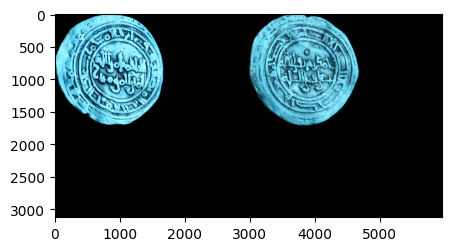

In [3]:
fig = plt.figure(figsize=(5, 6))
  
fig.add_subplot(1, 1, 1)
plt.imshow(image_list[0] )

In [ ]:
resized_image_list = [cv2.resize(image, (150, 300)) for image in image_list]

In [25]:
from sklearn.model_selection import train_test_split

# Assuming resized_image_list contains your images
X = resized_image_list  # Features (images)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming the images are RGB (3 channels)
input_shape = (250, 500, 3)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten the output of the conv layers to pass it to the dense layer
    Flatten(),
    
    # Add a dense layer to generate feature vectors. 
    # You can adjust the size of the output (e.g., 256) based on your needs
    Dense(256, activation='relu'),
])

# Display the model's architecture
model.summary()

C:\Users\avoav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 248, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 124, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 247, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 61, 123, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 59, 121, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 29, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 222720)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      57,016,576 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,109,824 (217.86 MB)

 Trainable params: 57,109,824 (217.86 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
import numpy as np
from sklearn.cluster import KMeans
from keras.applications import VGG16

# Load pre-trained VGG16
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


# Extract features
features = model.predict(X_train)

# Assuming 'features' is an array of feature vectors for your images
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)
cluster_labels = kmeans0.

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 295s 1us/step


MemoryError: Unable to allocate 392. MiB for an array with shape (25088, 4096) and data type float32

In [16]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from sklearn.cluster import KMeans
from keras.applications import VGG16

# Set the path to your image directory
data_path = "Combined_images"

# Load images using Pillow
image_list = []
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif'):
        img = Image.open(os.path.join(data_path, filename))
        image_list.append(np.array(img))  # Convert PIL Image to numpy array

In [33]:
# Resize images
#resized_image_list = [np.array(img.resize((150, 300))) for img in image_list]
resized_image_list = [cv2.resize(image, (300, 150)) for image in image_list]

In [34]:

# Convert resized_image_list to numpy array
X = np.array(resized_image_list)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [46]:
from sklearn.cluster import KMeans

# Flatten the images to make them suitable for clustering
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Dimensionality reduction (optional)
# You can skip this step and directly apply K-means if your data is not too high-dimensional
# from sklearn.decomposition import PCA
# pca = PCA(n_components=50)  # Adjust the number of components as needed
# X_train_flat = pca.fit_transform(X_train_flat)
# X_test_flat = pca.transform(X_test_flat)

# Initialize and fit K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_flat)

# Predict clusters for the test set
predicted_labels = kmeans.predict(X_test_flat)

# Visualize the clusters (optional)
# You can visualize the clusters using the reduced dimensions obtained from PCA or t-SNE
# Visualization helps in understanding the clustering results
# You may also use other techniques for visualization like UMAP
# Visualizing high-dimensional data directly is not feasible

# Evaluate the clustering (optional)
# Since this is unsupervised learning, you may not have ground truth labels to evaluate the clustering
# However, you can use metrics like silhouette score or Davies-Bouldin index to evaluate the quality of clustering


In [47]:
len(predicted_labels)

86

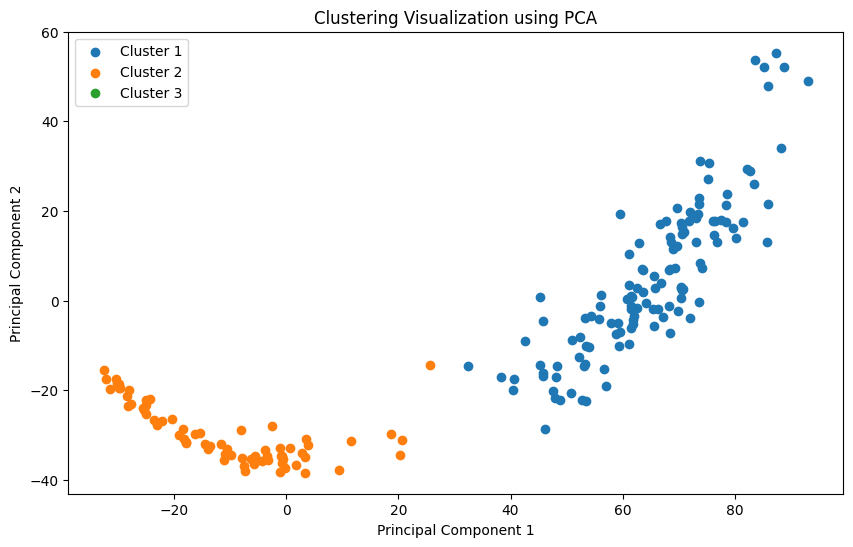

In [51]:
from sklearn.decomposition import PCA
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_flat)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
for cluster_label in range(1,4):
    plt.scatter(X_train_pca[kmeans.labels_ == cluster_label, 0],
                X_train_pca[kmeans.labels_ == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('Clustering Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

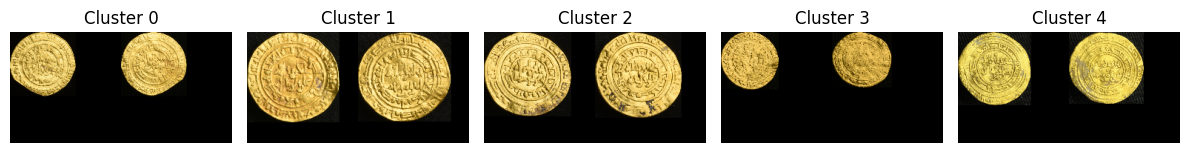

List of file names:
combined_150804.1.jpg_150804.2.jpg
combined_150792.1.jpg_150792.2.jpg
combined_150133.1.jpg_150133.2.jpg
combined_150780.1.jpg_150780.2.jpg
combined_150844.1.jpg_150844.2.jpg


In [41]:
# Find centroid of each cluster
centroids = kmeans.cluster_centers_

# Calculate distances from each data point to centroids
distances = np.sqrt(((X_train_flat[:, np.newaxis] - centroids) ** 2).sum(axis=2))

# Find the index of the closest image to each centroid
closest_image_indices = np.argmin(distances, axis=0)

# Create a list to store the file names
file_names_list = []

# Plot one image from each cluster
plt.figure(figsize=(12, 6))
for i, idx in enumerate(closest_image_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(f'Cluster {i}')
    plt.axis('off')
    file_name = os.listdir(data_path)[idx]  # Get the file name corresponding to the selected image
    file_names_list.append(file_name)  # Append the file name to the list
    plt.xlabel(file_name, fontsize=8)  # Print the file name in white
plt.tight_layout()
plt.show()

# Print the list of file names
print("List of file names:")
for file_name in file_names_list:
    print(file_name)


In [52]:
predicted_labels

array([0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2])